In [1]:
import pandas as pd

# Importing and Filtering the Data

My assigned county for this analysis was Cook County, Illinois so I will start by filtering out any data not pertaining to it.

In [2]:
confirmed_cases = pd.read_csv('RAW_us_confirmed_cases.csv')
confirmed_cases = confirmed_cases[(confirmed_cases['Admin2'] == 'Cook') & (confirmed_cases['Province_State'] == 'Illinois')]
confirmed_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21
642,Illinois,Cook,84017031,US,USA,840,17031.0,US,41.841448,-87.816588,...,634683,635373,636261,636261,636261,638201,638883,639447,640334,641268


From this, I have identified the FIPS county code for Cook County as code 17031. I will use this to filter the mask survey data later.

In [3]:
mask_mandates = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
mask_mandates = mask_mandates[(mask_mandates['County_Name'] == 'Cook County') & (mask_mandates['State_Tribe_Territory'] == 'IL')]
mask_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
162293,IL,Cook County,17,31,4/10/2020,2,NaN,NaN,NaN,NaN
162294,IL,Cook County,17,31,4/11/2020,2,NaN,NaN,NaN,NaN
162295,IL,Cook County,17,31,4/12/2020,2,NaN,NaN,NaN,NaN
162296,IL,Cook County,17,31,4/13/2020,2,NaN,NaN,NaN,NaN
162297,IL,Cook County,17,31,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
998670,IL,Cook County,17,31,8/11/2021,2,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-18 (Aug. 4, 2021)"
998671,IL,Cook County,17,31,8/12/2021,2,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-18 (Aug. 4, 2021)"
998672,IL,Cook County,17,31,8/13/2021,2,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-18 (Aug. 4, 2021)"
998673,IL,Cook County,17,31,8/14/2021,2,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-18 (Aug. 4, 2021)"


In [4]:
mask_use = pd.read_csv('mask-use-by-county.csv')
mask_use = mask_use[mask_use['COUNTYFP'] == 17031]
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
610,17031,0.023,0.021,0.072,0.162,0.722


# Standardizing and Combining the Data

The plan to combine this data is by using the dates as an index to establish a time series.

First, we need to unpivot the date columns in the confirmed cases dataset to rows. To make these easy, we should remove all non-date columns as we will not be needing them.

In [5]:
print(confirmed_cases.columns.tolist())

['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/

In [6]:
confirmed_cases = confirmed_cases.drop(columns=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
                                                'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
confirmed_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21
642,0,0,1,1,1,1,1,1,1,2,...,634683,635373,636261,636261,636261,638201,638883,639447,640334,641268


Now we can unpivot using melt

In [7]:
confirmed_cases = pd.melt(confirmed_cases, var_name='date', value_name='cases')
confirmed_cases

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,1
3,1/25/20,1
4,1/26/20,1
...,...,...
642,10/25/21,638201
643,10/26/21,638883
644,10/27/21,639447
645,10/28/21,640334


Next, we will create a date record for the new york times survey.
From the new york times survey documentation: "The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level."

This allows us to place the survey results as a record for the date 7/14/2020.

In [8]:
mask_use['date'] = pd.to_datetime('7/14/20')
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date
610,17031,0.023,0.021,0.072,0.162,0.722,2020-07-14


I will reformat all the dates to be datetime objects in YYYY-MM-DD format

In [9]:
confirmed_cases['date'] = pd.to_datetime(confirmed_cases['date'])
mask_mandates['date'] = pd.to_datetime(mask_mandates['date'])

All that is left now is to perform the merges:

In [10]:
merged = confirmed_cases.merge(mask_mandates, how='outer', on='date')
merged = merged.merge(mask_use, how='left', on='date')
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I will assume that any NaN/Null value for the "Face_Masks_Required_in_Public" field represents that there was no mask mandate during that day.

In [11]:
merged['Face_Masks_Required_in_Public'] = merged['Face_Masks_Required_in_Public'].fillna('No')
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visual inspection fo the data shows that the mask mandate days were all part of the same consecutive group of dates from 2020-05-01 to 2021-06-10. 

Sources here indicate that a second mandate started August 23rd 2021 https://cookcountypublichealth.org/2021/08/20/cook-county-department-of-public-health-mandates-indoor-mask-wearing/


This article confirms the second mandate extends to present day:
https://www.nbcchicago.com/news/local/indoor-mask-mandate-remains-in-effect-in-cook-county-despite-covid-cases-decreasing-officials-remind/2663364/
I will update the data to reflect this second mandate:

In [12]:
merged.loc[(merged['date'] >= '2021-08-23'), 'Face_Masks_Required_in_Public'] = 'Yes'
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis

The common question we are tasked to answer is the following:

How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?

To answer our question, I will model what would have happened had the first mask mandate not been enacted on May 1st 2020. To do this, I will replicate a simplified version of the SIRD model described here by Fernandez-Villaverde and Jones: https://web.stanford.edu/~chadj/sird-paper.pdf to project out to June 1st and compare the model to a different version of the model that includes the effect of masks. The simplification I make from the paper is to assume RO (base reproduction number) is fixed to a value of 1.5 that I discovered during experimentation with the simulation. This value best reflected the change in confirmed cases. 

Here are some assumptions:
* Masks are 67% effective at stopping transmission. This means that for the proportion of the population that wear masks, they experience a transmission rate that is 33% of the usual transmission rate. https://www.nature.com/articles/d41586-020-02801-8
* The R0 (transmission rate) values for Cook County are fixed at 1.5
* The population of Cook County is stable at 5,275,541 as shown in the county assignment spreadsheet https://docs.google.com/spreadsheets/d/1WKWAsYVfSvuGWf8a29K2dT45elbi0E1vbnym84WdmWE/edit#gid=0
* Those that are infected and recover are immune
* Recovery rate is on average 10 days https://www.microcovid.org/paper/14-research-sources
* Death rate is on average 1%
* Infectious period is on average 5 days
* There is full compliance with the mask mandate

We will step through the time series to run the simulation.

In [13]:
# From stanford study:
# 1/gamma = 5 day infectious period
gamma = 0.2
# 1/theta = 10 day resolution time
theta = 0.1
# death rate of 1%
delta = 0.01
# Population of Cook County
N = 5275751
# Base Reproduction Number
RO = 1.5
# Reproduction Number for Time Period t
RT = RO * gamma



# death rate * avg resolution time * number resolved
# Calculates change in dead for a time period
def calc_d_dead(delta, theta, prev_resolve):
    return delta*theta*prev_resolve
# 1 - death rate is survival rate
# calculates change in recovered for a time period
def calc_d_recov(delta, theta, prev_resolve):
    return (1-delta)*theta*prev_resolve

# avg infectious time * previous infectious pop - previous resolutions
# calculates change in resolved for a time period
def calc_d_resolv(gamma, prev_infect, theta, prev_resolve):
    return gamma*prev_infect - theta*prev_resolve

# (repro number in time period t * susceptible pop * infectious pop) / total pop - recovered infectious
# calculates change in infected for a time period
def calc_d_infect(RT, prev_infect, N, prev_susceptible, gamma):
    return ((RT * prev_susceptible * prev_infect)/ N) - gamma*prev_infect

# negative repro number in time period t * infectious pop * susceptible pop / total pop
# calculates change in susceptible for a time period
def calc_d_suscept(RT, prev_infect, prev_susceptible, N):
    return -1*RT*prev_infect*prev_susceptible/N


# Index 2 is the start of the confirmed cases 
# Initialize estimates
merged['est_susceptible'] = None
merged['est_susceptible'][2] = 5275751 - 1
merged['est_infected'] = None
merged['est_infected'][2] = 1
merged['est_recovered'] = None 
merged['est_recovered'][2] = 0
merged['est_resolving'] = None
merged['est_resolving'][2] = 0
merged['est_dead'] = None
merged['est_dead'][2] = 0

# Filter to day of first confirmed case and one month past the mandate
model_df = merged[(merged['date'] <= pd.to_datetime('2020-06-01')) & (merged['date'] >= pd.to_datetime('2020-01-24'))]

<ipython-input-13-5dfe99a8b2b6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['est_susceptible'][2] = 5275751 - 1
<ipython-input-13-5dfe99a8b2b6>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['est_infected'][2] = 1
<ipython-input-13-5dfe99a8b2b6>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['est_recovered'][2] = 0
<ipython-input-13-5dfe99a8b2b6>:51: SettingWithCopyWarning: 
A value is trying to be set 

In [14]:
for index,row in model_df.iterrows():
    if index == 2:
        print('skip')
        continue
    
    prev_infect = model_df['est_infected'][index-1]
    prev_resolve = model_df['est_resolving'][index-1]
    prev_recov = model_df['est_recovered'][index-1]
    prev_dead = model_df['est_dead'][index-1]
    prev_susceptible = model_df['est_susceptible'][index-1]
    
    model_df.at[index, 'est_susceptible'] = prev_susceptible + calc_d_suscept(RT, prev_infect, prev_susceptible, N)
    model_df.at[index, 'est_infected'] = prev_infect + calc_d_infect(RT, prev_infect, N, prev_susceptible, gamma)
    model_df.at[index, 'est_resolving'] = prev_resolve + calc_d_resolv(gamma, prev_infect, theta, prev_resolve)
    model_df.at[index,'est_recovered'] = prev_recov + calc_d_recov(delta, theta, prev_resolve)
    model_df.at[index, 'est_dead'] = prev_dead + calc_d_dead(delta, theta, prev_resolve)
pd.set_option('display.max_rows', 200)
model_df

skip


,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,...,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,est_susceptible,est_infected,est_recovered,est_resolving,est_dead
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275750,1,0,0,0
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.7,1.1,0.0,0.2,0.0
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.37,1.21,0.0198,0.4,0.0002
5,2020-01-27,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.007,1.331,0.0594,0.602,0.0006
6,2020-01-28,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275748.607701,1.4641,0.118998,0.808,0.001202
7,2020-01-29,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275748.168471,1.610509,0.19899,1.02002,0.00201
8,2020-01-30,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275747.685318,1.77156,0.299972,1.24012,0.00303
9,2020-01-31,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275747.153851,1.948716,0.422744,1.47042,0.00427
10,2020-02-01,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275746.569236,2.143587,0.568315,1.713121,0.005741
11,2020-02-02,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275745.926161,2.357945,0.737914,1.970526,0.007454


In [15]:
total_infected_nomask = model_df.iloc[-1:]['est_infected'] + model_df.iloc[-1:]['est_resolving'] + \
                        model_df.iloc[-1:]['est_recovered'] + model_df.iloc[-1:]['est_dead'] 

total_infected_nomask

131    537169.196888
dtype: object

This model highlights the difficulty in answering this question without a complex understanding of the effects of the reproduction rate RO of the virus. Setting RO too high results in everyone getting infected in a short timeframe, while setting it too low results in underestimating the impact. RO changes constantly, so my simplification of constant RO is probably the issue. I explored fitting a linear model to the change in RO from the stanford paper, but the result was an initial RO of over 4 which caused the model to accelerate well beyond what was observed in the confirmed cases. After testing, I found that an RO of 1.5 seemed to match roughly what was observed in the confirmed cases counts. To assess how this model would differ with the introduction of a mask mandate, we will a compare the model to another version of the model assuming 100% compliance.

If we rerun this model again by adding the effect of masks after May 1st: 

In [16]:
# Mask Effectiveness Coefficient:
rho = 0.33
RT = RO * gamma

for index,row in model_df.iterrows():
    if index == 2:
        print('skip')
        continue
    if row['date'] == pd.to_datetime('2020-05-01'):
        # Mask Reproduction Number
        RT = RT * rho

    prev_infect = model_df['est_infected'][index-1]
    prev_resolve = model_df['est_resolving'][index-1]
    prev_recov = model_df['est_recovered'][index-1]
    prev_dead = model_df['est_dead'][index-1]
    prev_susceptible = model_df['est_susceptible'][index-1]
    
    model_df.at[index, 'est_susceptible'] = prev_susceptible + calc_d_suscept(RT, prev_infect, prev_susceptible, N)
    model_df.at[index, 'est_infected'] = prev_infect + calc_d_infect(RT, prev_infect, N, prev_susceptible, gamma)
    model_df.at[index, 'est_resolving'] = prev_resolve + calc_d_resolv(gamma, prev_infect, theta, prev_resolve)
    model_df.at[index,'est_recovered'] = prev_recov + calc_d_recov(delta, theta, prev_resolve)
    model_df.at[index, 'est_dead'] = prev_dead + calc_d_dead(delta, theta, prev_resolve)
pd.set_option('display.max_rows', 200)
model_df

skip


,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,...,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,est_susceptible,est_infected,est_recovered,est_resolving,est_dead
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275750,1,0,0,0
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.7,1.1,0.0,0.2,0.0
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.37,1.21,0.0198,0.4,0.0002
5,2020-01-27,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275749.007,1.331,0.0594,0.602,0.0006
6,2020-01-28,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275748.607701,1.4641,0.118998,0.808,0.001202
7,2020-01-29,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275748.168471,1.610509,0.19899,1.02002,0.00201
8,2020-01-30,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275747.685318,1.77156,0.299972,1.24012,0.00303
9,2020-01-31,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275747.153851,1.948716,0.422744,1.47042,0.00427
10,2020-02-01,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275746.569236,2.143587,0.568315,1.713121,0.005741
11,2020-02-02,2,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5275745.926161,2.357945,0.737914,1.970526,0.007454


In [17]:
total_infected_mask = model_df.iloc[-1:]['est_infected'] + model_df.iloc[-1:]['est_resolving'] + \
                        model_df.iloc[-1:]['est_recovered'] + model_df.iloc[-1:]['est_dead'] 

total_infected_mask

131    40275.847608
dtype: object

What we see from the comparison of these two models is that after 1 month of 100% compliance in mask mandates, the total number of infected drops from 537169 to 40275, a 92% decrease.

For our plots in the next section, we will calculate the rate of change of cases in our dataset:

In [18]:
merged['dc/dt'] = merged['cases'].diff() / merged['date'].diff().dt.days
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,...,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,est_susceptible,est_infected,est_recovered,est_resolving,est_dead,dc/dt
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,0.0
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,5275750,1,0,0,0,1.0
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,0.0
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,1940.0
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,682.0
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,564.0
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,None,None,None,887.0


With this we can now plot the rate of change of covid cases over time with and without mandates. To smooth out the day-to-day volatility in confirmed cases, I chose to use the 7-day moving average of the change in covid cases. Credit to Grant Savage for showing me this method.

In [19]:
merged['dc/dt 7 day avg'] = merged['dc/dt'].rolling(window=7).mean().round()
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,...,SOMETIMES,FREQUENTLY,ALWAYS,est_susceptible,est_infected,est_recovered,est_resolving,est_dead,dc/dt,dc/dt 7 day avg
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,0.0,NaN
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,5275750,1,0,0,0,1.0,NaN
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,0.0,NaN
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,1940.0,715.0
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,682.0,713.0
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,564.0,681.0
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,None,None,None,None,None,887.0,709.0


In [20]:
merged['d(dc/dt) 7 day avg'] = merged['dc/dt 7 day avg'].diff() / merged['date'].diff().dt.days
merged

,date,cases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,...,FREQUENTLY,ALWAYS,est_susceptible,est_infected,est_recovered,est_resolving,est_dead,dc/dt,dc/dt 7 day avg,d(dc/dt) 7 day avg
0,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN
1,2020-01-23,0,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,None,None,None,None,None,0.0,NaN,NaN
2,2020-01-24,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,5275750,1,0,0,0,1.0,NaN,NaN
3,2020-01-25,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,None,None,None,None,None,0.0,NaN,NaN
4,2020-01-26,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,None,None,None,None,None,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-10-25,638201,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,None,None,None,None,None,1940.0,715.0,1.0
643,2021-10-26,638883,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,None,None,None,None,None,682.0,713.0,-2.0
644,2021-10-27,639447,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,None,None,None,None,None,564.0,681.0,-32.0
645,2021-10-28,640334,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,NaN,NaN,None,None,None,None,None,887.0,709.0,28.0


# Visualization

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

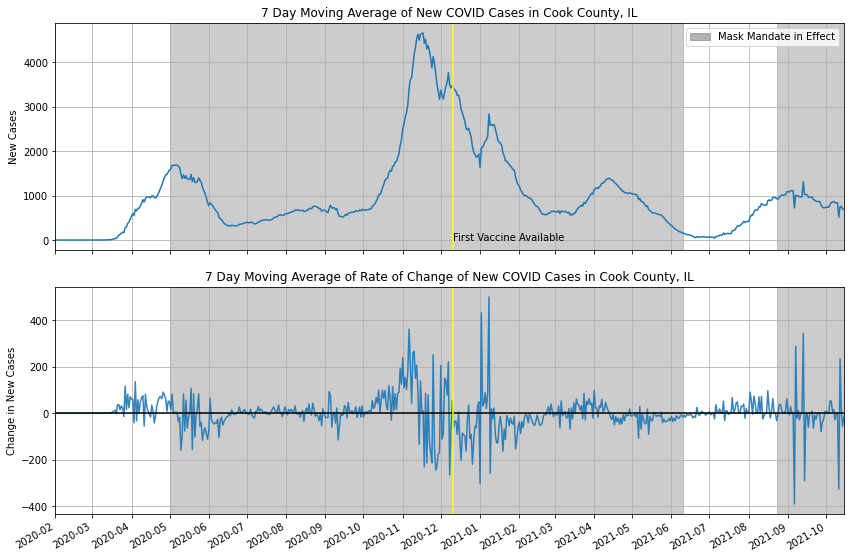

In [22]:
fig = plt.figure(figsize=(12, 9))



# First Vaccine Introduced: Dec. 11, 2020


# Adds subplot on position 1
ax = fig.add_subplot(211)
# Adds subplot on position 2
ax2 = fig.add_subplot(212)

ax.plot(merged['date'], merged['dc/dt 7 day avg'])
ax.axvspan(pd.to_datetime('2020-05-01'), pd.to_datetime('2021-06-10'), alpha=0.4, color = 'gray')
ax.axvspan(pd.to_datetime('2021-08-23'), pd.to_datetime('2021-10-29'), alpha=0.4, color = 'gray')
ax.set_xlim(pd.to_datetime('2020-02-01'), pd.to_datetime('2021-10-15'))
ax.set_title('7 Day Moving Average of New COVID Cases in Cook County, IL')
ax.set_ylabel('New Cases')
ax.xaxis.set_major_locator(mdates.MonthLocator())
gray_patch = mpatches.Patch(color='gray', alpha=0.6, label='Mask Mandate in Effect')
ax.legend(loc='upper right', handles=[gray_patch])
ax.grid(True)
ax.text(pd.to_datetime('2020-12-11'), 0, 'First Vaccine Available', color='black')
ax.axvline(pd.to_datetime('2020-12-11'), color='yellow')

ax2.plot(merged['date'], merged['d(dc/dt) 7 day avg'], alpha=0.9)
ax2.axvspan(pd.to_datetime('2020-05-01'), pd.to_datetime('2021-06-10'), alpha=0.4, color = 'gray')
ax2.axvspan(pd.to_datetime('2021-08-23'), pd.to_datetime('2021-10-29'), alpha=0.4, color = 'gray')
ax2.set_xlim(pd.to_datetime('2020-02-01'), pd.to_datetime('2021-10-15'))
ax2.set_title('7 Day Moving Average of Rate of Change of New COVID Cases in Cook County, IL')
ax2.axhline(color='black')
ax2.set_ylabel('Change in New Cases')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.grid(True)
ax2.axvline(pd.to_datetime('2020-12-11'), color='yellow')

plt.tight_layout()
fig.autofmt_xdate()
plt.show()

# Extension Analysis, Education

The question I would like to address is what impact COVID has had on children's education, particularly if the impact is disproportionate in poorer communities that may lack access to electricity, internet, and quiet workspaces. My hypothesis is that there is a statistically significant difference in the mean values of dropout rates, attendance rates, and teacher retention rates pre and post pandemic (2019-2020 school year) and (2020 - 2021 school year). I will do this use a repeated measures t-test, also known as a dependent t-test for paired samples.

Glossary of terms can be found here: https://www.isbe.net/Documents/2021-Report-Card-Glossary-Terms.pdf

# Import New Data

In [23]:
state = pd.read_csv('state_data.csv')
state = state[(state['Year'] == 2020) | (state['Year'] == 2021)]
state.groupby('RCDTS').count()['School Name'].unique()

array([2, 1], dtype=int64)

There are some schools that do not have proper pairs. Lets remove all schools that have only a single occurrence in the dataset. This means it is a datapoint that we do not have pre and post pandemic results for.

In [24]:
state = state[state.groupby('RCDTS').RCDTS.transform(len) > 1]

In [25]:
state['Title 1 Status'].unique()

array(['Eligible, but Not a Participant in Title One Program',
       'Schoolwide Title One Program',
       'Targeted Assistance Title One Program',
       'Not a Participant in Title One Program',
       'Schoolwide Title I Program',
       'Targeted Assistance Title I Program',
       'Not a Participant in Title I Program'], dtype=object)

First, I will filter out the schools that have missing data from one or more year.

In [26]:
missing_ids = state[(state['Student Attendance Rate'].isnull()) |
                    ((state['School Type'] == 'HIGH SCHOOL') & (state['High School Dropout Rate - Total'].isnull())) |
                    (state['Teacher Retention Rate'].isnull())]['RCDTS']
state = state[~state['RCDTS'].isin(missing_ids)]
state

,Year,RCDTS,School Name,City,County,Title 1 Status,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,High School Dropout Rate - Total,School Type,Teacher Retention Rate
0,2020,050160150041011,Plum Grove Jr High School,Rolling Meadows,Cook,"Eligible, but Not a Participant in Title One P...",97.7,3.7,1.5,NaN,MIDDLE SCHL,94.3
1,2020,050160150041014,Carl Sandburg Jr High School,Rolling Meadows,Cook,Schoolwide Title One Program,97.0,3.4,2.3,NaN,MIDDLE SCHL,94.5
2,2020,050160150041016,Winston Campus Jr High,Palatine,Cook,Schoolwide Title One Program,96.5,6.5,7.1,NaN,MIDDLE SCHL,79.1
3,2020,050160150041018,Walter R Sundling Jr High Sch,Palatine,Cook,"Eligible, but Not a Participant in Title One P...",96.7,4.6,2.6,NaN,MIDDLE SCHL,94.5
4,2020,050160150042001,Jane Addams Elem School,Palatine,Cook,Schoolwide Title One Program,95.8,8.3,6.6,NaN,ELEMENTARY,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3741,2021,15016900025201C,Horizon Science Acad-McKinley Park Charter Sch,Chicago,Cook,Schoolwide Title I Program,93.4,2.7,32.7,0.7,CHARTER SCH,84.4
3742,2021,15016901025201C,Horizon Science Acad-Belmont Charter Sch,Chicago,Cook,Schoolwide Title I Program,94.9,1.6,26.3,NaN,CHARTER SCH,65.7
3744,2021,15016903025201C,Bronzeville Academy Charter School,Chicago,Cook,Schoolwide Title I Program,85.5,15.3,66.0,NaN,CHARTER SCH,55.9
3745,2021,15016904025201C,Betty Shabazz International Charter School,Chicago,Cook,Schoolwide Title I Program,85.8,12.4,58.7,NaN,CHARTER SCH,67.3


Now, I will analyze the change in attendance rates pre and post pandemic for title 1 and non-title 1 schools. A 'title one' school is defined here: https://www.isbe.net/Documents/2021-Report-Card-Glossary-Terms.pdf. For simplicity, I assumed that the title one status of the school in 2021 is the status for the other years to prevent schools that were in two different categories in that time period from belonging in both groups.

In [27]:
titleone_ids = state[((state['Title 1 Status'] == 'Schoolwide Title One Program') |
                     (state['Title 1 Status'] == 'Schoolwide Title I Program')) &
                     (state['Year'] == 2021)]['RCDTS']
titleone = state[state['RCDTS'].isin(titleone_ids)]
titleone

,Year,RCDTS,School Name,City,County,Title 1 Status,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,High School Dropout Rate - Total,School Type,Teacher Retention Rate
1,2020,050160150041014,Carl Sandburg Jr High School,Rolling Meadows,Cook,Schoolwide Title One Program,97.0,3.4,2.3,NaN,MIDDLE SCHL,94.5
2,2020,050160150041016,Winston Campus Jr High,Palatine,Cook,Schoolwide Title One Program,96.5,6.5,7.1,NaN,MIDDLE SCHL,79.1
4,2020,050160150042001,Jane Addams Elem School,Palatine,Cook,Schoolwide Title One Program,95.8,8.3,6.6,NaN,ELEMENTARY,80.0
5,2020,050160150042003,Central Road Elem School,Rolling Meadows,Cook,Schoolwide Title One Program,97.0,8.6,2.1,NaN,ELEMENTARY,88.0
7,2020,050160150042005,Kimball Hill Elem School,Rolling Meadows,Cook,Schoolwide Title One Program,96.7,4.2,3.0,NaN,ELEMENTARY,83.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3733,2021,150162990252970,Richardson Middle School,Chicago,Cook,Schoolwide Title I Program,92.8,3.3,30.6,NaN,ELEMENTARY,93.0
3741,2021,15016900025201C,Horizon Science Acad-McKinley Park Charter Sch,Chicago,Cook,Schoolwide Title I Program,93.4,2.7,32.7,0.7,CHARTER SCH,84.4
3742,2021,15016901025201C,Horizon Science Acad-Belmont Charter Sch,Chicago,Cook,Schoolwide Title I Program,94.9,1.6,26.3,NaN,CHARTER SCH,65.7
3744,2021,15016903025201C,Bronzeville Academy Charter School,Chicago,Cook,Schoolwide Title I Program,85.5,15.3,66.0,NaN,CHARTER SCH,55.9


In [28]:
not_titleone = state[~state['RCDTS'].isin(titleone_ids)]
not_titleone

,Year,RCDTS,School Name,City,County,Title 1 Status,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,High School Dropout Rate - Total,School Type,Teacher Retention Rate
0,2020,050160150041011,Plum Grove Jr High School,Rolling Meadows,Cook,"Eligible, but Not a Participant in Title One P...",97.7,3.7,1.5,NaN,MIDDLE SCHL,94.3
3,2020,050160150041018,Walter R Sundling Jr High Sch,Palatine,Cook,"Eligible, but Not a Participant in Title One P...",96.7,4.6,2.6,NaN,MIDDLE SCHL,94.5
6,2020,050160150042004,Marion Jordan Elem School,Palatine,Cook,"Eligible, but Not a Participant in Title One P...",97.1,4.6,3.5,NaN,ELEMENTARY,90.8
8,2020,050160150042006,Hunting Ridge Elem School,Palatine,Cook,"Eligible, but Not a Participant in Title One P...",97.1,6.1,3.2,NaN,ELEMENTARY,87.9
12,2020,050160150042010,Pleasant Hill Elem School,Palatine,Cook,"Eligible, but Not a Participant in Title One P...",97.5,3.6,1.5,NaN,ELEMENTARY,92.7
...,...,...,...,...,...,...,...,...,...,...,...,...
3723,2021,150162990252959,Skinner North Elem Sch,Chicago,Cook,"Eligible, but Not a Participant in Title One P...",98.5,2.9,3.2,NaN,ELEMENTARY,88.7
3730,2021,150162990252967,STEM Magnet Academy Elem,Chicago,Cook,"Eligible, but Not a Participant in Title One P...",98.0,1.2,7.3,NaN,ELEMENTARY,90.0
3734,2021,150162990252971,Sor Juana Ines de la Cruz,Chicago,Cook,"Eligible, but Not a Participant in Title One P...",96.9,1.7,5.8,NaN,ELEMENTARY,100.0
3735,2021,150162990252972,Bronzeville Classical Elementary School,Chicago,Cook,"Eligible, but Not a Participant in Title One P...",98.6,2.6,5.0,NaN,ELEMENTARY,100.0


Now, I will perform a paired sample t test to test whether the mean dropout and graduation rates are different in the pre and post pandemic.

In [104]:
import scipy.stats as sts
import numpy as np

Text(0, 0.5, 'Frequency')

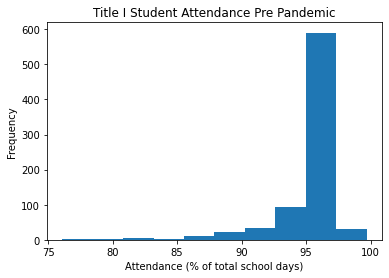

In [105]:
attendance_titleone_pre = titleone[titleone['Year'] < 2021]['Student Attendance Rate']
attendance_titleone_post = titleone[titleone['Year'] == 2021]['Student Attendance Rate']
plt.hist(attendance_titleone_pre)
plt.title('Title I Student Attendance Pre Pandemic')
plt.xlabel('Attendance (% of total school days)')
plt.ylabel('Frequency')

([<matplotlib.axis.YTick at 0x22f4899f310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

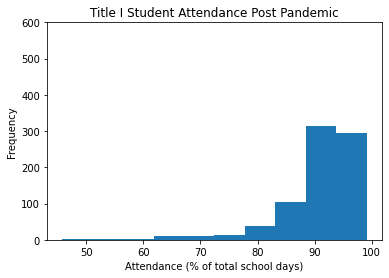

In [109]:
plt.hist(attendance_titleone_post)
plt.title('Title I Student Attendance Post Pandemic')
plt.xlabel('Attendance (% of total school days)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0,601,100))

In [69]:
sts.ttest_rel(attendance_titleone_pre, attendance_titleone_post)

Ttest_relResult(statistic=24.332547172434598, pvalue=5.222635712376984e-98)

In [70]:
attendance_titleone_pre.describe()

count    790.000000
mean      95.371392
std        2.514499
min       76.100000
25%       95.200000
50%       96.100000
75%       96.700000
max       99.700000
Name: Student Attendance Rate, dtype: float64

In [71]:
attendance_titleone_post.describe()

count    790.000000
mean      90.690127
std        6.853710
min       45.800000
25%       88.800000
50%       92.700000
75%       94.900000
max       99.100000
Name: Student Attendance Rate, dtype: float64

We reject the null hypothesis. There is a difference in mean attendance rates pre and post pandemic. Lets see if this is present in non-title one schoosl as well.

Text(0, 0.5, 'Frequency')

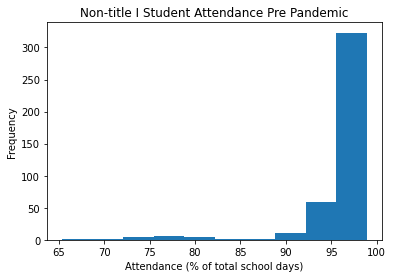

In [72]:
attendance_nottitleone_pre = not_titleone[not_titleone['Year'] < 2021]['Student Attendance Rate']
attendance_nottitleone_post = not_titleone[not_titleone['Year'] == 2021]['Student Attendance Rate']
plt.hist(attendance_nottitleone_pre)
plt.title('Non-title I Student Attendance Pre Pandemic')
plt.xlabel('Attendance (% of total school days)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

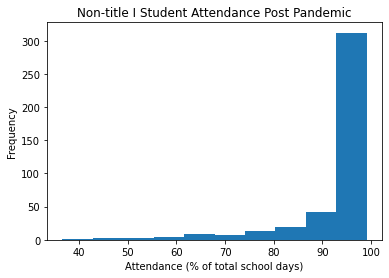

In [73]:
plt.hist(attendance_nottitleone_post)
plt.title('Non-title I Student Attendance Post Pandemic')
plt.xlabel('Attendance (% of total school days)')
plt.ylabel('Frequency')

In [74]:
sts.ttest_rel(attendance_nottitleone_pre, attendance_nottitleone_post)

Ttest_relResult(statistic=8.838679863523863, pvalue=2.863662369692907e-17)

In [75]:
attendance_nottitleone_pre.describe()

count    412.000000
mean      95.363107
std        4.424456
min       65.400000
25%       95.900000
50%       96.600000
75%       97.100000
max       98.900000
Name: Student Attendance Rate, dtype: float64

In [76]:
attendance_nottitleone_post.describe()

count    412.000000
mean      92.537379
std        9.435686
min       36.600000
25%       93.000000
50%       95.900000
75%       97.300000
max       99.100000
Name: Student Attendance Rate, dtype: float64

Text(0, 0.5, 'Frequency')

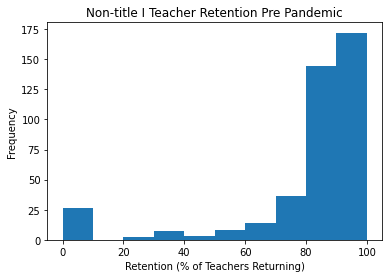

In [79]:
retention_nottitleone_pre = not_titleone[not_titleone['Year'] == 2020]['Teacher Retention Rate']
retention_nottitleone_post = not_titleone[not_titleone['Year'] == 2021]['Teacher Retention Rate']
plt.hist(retention_nottitleone_pre)
plt.title('Non-title I Teacher Retention Pre Pandemic')
plt.xlabel('Retention (% of Teachers Returning)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

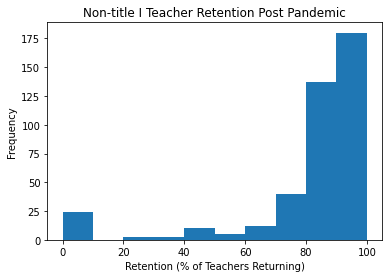

In [78]:
plt.hist(retention_nottitleone_post)
plt.title('Non-title I Teacher Retention Post Pandemic')
plt.xlabel('Retention (% of Teachers Returning)')
plt.ylabel('Frequency')

In [80]:
sts.ttest_rel(retention_nottitleone_pre, retention_nottitleone_post)

Ttest_relResult(statistic=-2.8806310102920167, pvalue=0.004176576290652141)

In [81]:
retention_nottitleone_pre.describe()

count    412.000000
mean      80.134223
std       24.054790
min        0.000000
25%       80.675000
50%       88.500000
75%       92.625000
max      100.000000
Name: Teacher Retention Rate, dtype: float64

In [82]:
retention_nottitleone_post.describe()

count    412.000000
mean      81.007282
std       23.332189
min        0.000000
25%       80.800000
50%       88.700000
75%       93.600000
max      100.000000
Name: Teacher Retention Rate, dtype: float64

We fail to reject the null hypothesis. There seems to be no difference in teacher retention rates pre and post pandemic for non-title one schools.

Text(0, 0.5, 'Frequency')

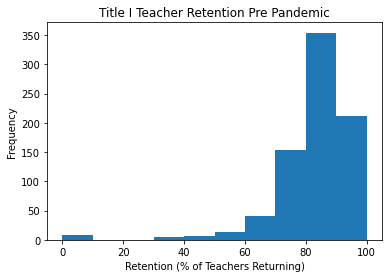

In [85]:
retention_titleone_pre = titleone[titleone['Year'] < 2021]['Teacher Retention Rate']
retention_titleone_post = titleone[titleone['Year'] == 2021]['Teacher Retention Rate']
plt.hist(retention_titleone_pre)
plt.title('Title I Teacher Retention Pre Pandemic')
plt.xlabel('Retention (% of Teachers Returning)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

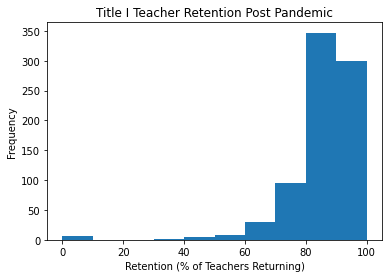

In [86]:
plt.hist(retention_titleone_post)
plt.title('Title I Teacher Retention Post Pandemic')
plt.xlabel('Retention (% of Teachers Returning)')
plt.ylabel('Frequency')

In [87]:
sts.ttest_rel(retention_titleone_pre, retention_titleone_post)

Ttest_relResult(statistic=-12.108450270423656, pvalue=4.486820637599751e-31)

In [88]:
retention_titleone_pre.describe()

count    790.000000
mean      82.348354
std       12.914986
min        0.000000
25%       78.500000
50%       85.100000
75%       90.100000
max      100.000000
Name: Teacher Retention Rate, dtype: float64

In [89]:
retention_titleone_post.describe()

count    790.000000
mean      85.393291
std       11.415857
min        0.000000
25%       82.300000
50%       87.300000
75%       92.100000
max      100.000000
Name: Teacher Retention Rate, dtype: float64

There seems to be a roughly 3 percentage point increase in mean teacher retention rates for title one schools pre and post pandemic.

([<matplotlib.axis.XTick at 0x22f4854ea30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

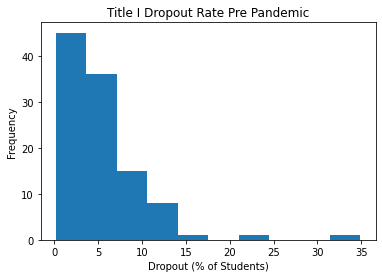

In [101]:
dropout_titleone_pre = titleone[(titleone['School Type'] == 'HIGH SCHOOL') & (titleone['Year'] < 2021)]['High School Dropout Rate - Total']
dropout_titleone_post = titleone[(titleone['School Type'] == 'HIGH SCHOOL') & (titleone['Year'] == 2021)]['High School Dropout Rate - Total']
plt.hist(dropout_titleone_pre)
plt.title('Title I Dropout Rate Pre Pandemic')
plt.xlabel('Dropout (% of Students)')
plt.ylabel('Frequency')
plt.xticks([0,5,10,15,20,25,30,35])

([<matplotlib.axis.XTick at 0x22f485c0610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

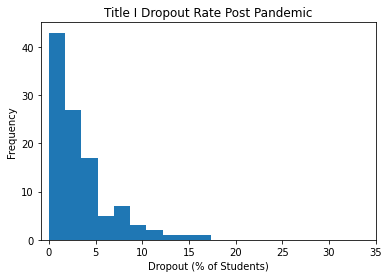

In [102]:
plt.hist(dropout_titleone_post)
plt.title('Title I Dropout Rate Post Pandemic')
plt.xlabel('Dropout (% of Students)')
plt.ylabel('Frequency')
plt.xticks([0,5,10,15,20,25,30,35])

In [53]:
sts.ttest_rel(dropout_titleone_pre, dropout_titleone_post)

Ttest_relResult(statistic=5.8997508362228634, pvalue=4.409205699530782e-08)

In [54]:
dropout_titleone_pre.describe()

count    107.000000
mean       5.386916
std        4.731789
min        0.200000
25%        2.200000
50%        4.200000
75%        7.050000
max       34.900000
Name: High School Dropout Rate - Total, dtype: float64

In [55]:
dropout_titleone_post.describe()

count    107.000000
mean       3.319626
std        3.315613
min        0.000000
25%        0.900000
50%        2.400000
75%        4.350000
max       17.400000
Name: High School Dropout Rate - Total, dtype: float64

There seems to be a roughly 3 percentage point drop in the dropout rate in title one schools

([<matplotlib.axis.XTick at 0x22f484766d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

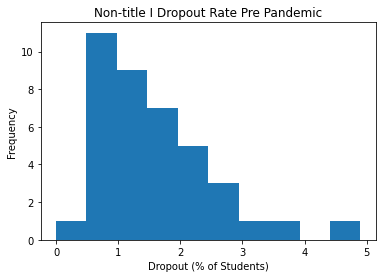

In [99]:
dropout_nottitleone_pre = not_titleone[(not_titleone['School Type'] == 'HIGH SCHOOL') & (not_titleone['Year'] < 2021)]['High School Dropout Rate - Total']
dropout_nottitleone_post = not_titleone[(not_titleone['School Type'] == 'HIGH SCHOOL') & (not_titleone['Year'] == 2021)]['High School Dropout Rate - Total']
plt.hist(dropout_nottitleone_pre)
plt.title('Non-title I Dropout Rate Pre Pandemic')
plt.xlabel('Dropout (% of Students)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5])

([<matplotlib.axis.XTick at 0x22f484e0b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

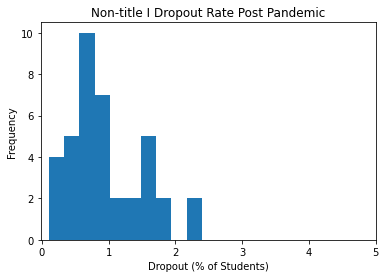

In [100]:
plt.hist(dropout_nottitleone_post)
plt.title('Non-title I Dropout Rate Post Pandemic')
plt.xlabel('Dropout (% of Students)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5])

In [96]:
sts.ttest_rel(dropout_nottitleone_pre, dropout_nottitleone_post)

Ttest_relResult(statistic=5.648582338447428, pvalue=1.7275959242150375e-06)

In [97]:
dropout_nottitleone_pre.describe()

count    39.000000
mean      1.571795
std       0.952821
min       0.000000
25%       0.850000
50%       1.300000
75%       2.000000
max       4.900000
Name: High School Dropout Rate - Total, dtype: float64

In [98]:
dropout_nottitleone_post.describe()

count    39.000000
mean      0.958974
std       0.568339
min       0.100000
25%       0.600000
50%       0.800000
75%       1.300000
max       2.400000
Name: High School Dropout Rate - Total, dtype: float64